# Homework 3: DataFrames, Control Flow, and Probability

## Due Tuesday, May 2nd at 11:59PM

Welcome to Homework 3! This homework will cover lots of different topics:
- Grouping with subgroups (see [BPD 11](https://notes.dsc10.com/02-data_sets/groupby.html#subgroups))
- Merging DataFrames (see [BPD 13](https://notes.dsc10.com/02-data_sets/merging.html))
- Conditional statements (see [CIT 9.1](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html))
- Iteration (see [CIT 9.2](https://inferentialthinking.com/chapters/09/2/Iteration.html))
- Probability (see [CIT 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html))

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [19]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import numpy as np
import otter
grader = otter.Notebook()

# We need to import some extra packages for some fun demonstrations.
import json
from ipywidgets import interact, widgets
from IPython.display import YouTubeVideo, HTML, display, clear_output, Image, IFrame

# Don't worry about this.
def read_json(path):
    f = open(path, 'r')
    return json.load(f)

def candy_map():
    src = f"https://map.candystore.com/halloween/2022/fullscreen.html"
    width = 600
    height = 400
    display(IFrame(src, width, height))
    
import warnings
warnings.simplefilter('ignore')

%reload_ext pandas_tutor

### Supplemental Video on DataHub and Jupyter Notebooks

In Lab 0, we linked you to a video that walks you through key ideas you should be aware of when working on DataHub and in Jupyter Notebooks, including
- how files are organized on DataHub
- what it means to "restart the kernel"
- how to use keyboard shortcuts (most important: use `SHIFT + ENTER` to run a cell!)

We're linking it here again for your convenience. If you feel a little shaky on how to work your way around a notebook or troubleshoot issues, we recommend you give it another watch. (When troubleshooting, make sure to always check the [Debugging](https://dsc10.com/debugging/) tab on the course website as well.)

The video is quite long, but if you open the video directly on YouTube (which you can do by clicking the video's title after it loads in the next cell) you'll see timestamps in the description which you can use to jump to different parts of the video depending on what you'd like to learn more about.

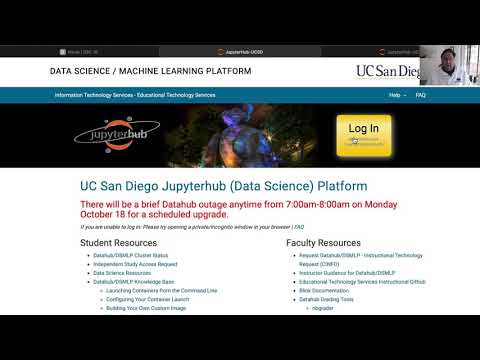

In [20]:
# Run this cell.
YouTubeVideo('Hq8VaNirDRQ')

## 1. 100 Years of "S" Baby Names 👶🏻

In this problem, we'll look at baby names starting with "S". The data file `data/baby_names.csv` contains information about "S" baby names in the US from the past 100 years. Run the cell below to read in the data.

In [21]:
baby = bpd.read_csv('data/baby_names.csv')
baby

,State,Gender,Year,Name,Count
0,AK,F,1922,Sarah,5
1,AK,M,1922,Samuel,5
2,AL,M,1922,Solomon,14
3,AL,M,1922,Stephen,12
4,AL,M,1922,Steve,11
...,...,...,...,...,...
377069,WY,M,2021,Samuel,10
377070,WY,M,2021,Silas,8
377071,WY,M,2021,Sebastian,7
377072,WY,M,2021,Santiago,5


In [22]:
baby[baby.get("Name") == "Sarah"]

,State,Gender,Year,Name,Count
0,AK,F,1922,Sarah,5
40,AL,F,1922,Sarah,342
41,AR,F,1922,Sarah,77
91,AZ,F,1922,Sarah,19
116,CA,F,1922,Sarah,66
...,...,...,...,...,...
376643,VA,F,2021,Sarah,76
376789,VT,F,2021,Sarah,6
376866,WA,F,2021,Sarah,44
376985,WI,F,2021,Sarah,25


The DataFrame `baby` has a row for each `'State'` (50 US states plus Washington DC), `'Gender'` (`'M'` or `'F'`, as assigned at birth), `'Year'` (between 1972 and 2021), and `'Name'`. The `'Count'` column records the number of babies of that gender who were given that name in one state in one year. 

For example, the first row of the DataFrame shows that there were 5 female babies named Sarah born in Alaska in 1922. There are many other rows corresponding to a `'Name'` of Sarah, which come from other years, other states, and also male babies named Sarah, of which there are some!

Run the cell below to find out when and where many male Sarahs were born.

In [23]:
male_sarahs = baby[(baby.get('Name')=='Sarah') & (baby.get('Gender')=='M') ]
male_sarahs.sort_values(by='Count', ascending=False)

,State,Gender,Year,Name,Count
206828,DC,M,1989,Sarah,72
284830,KY,M,2004,Sarah,35
191668,CA,M,1986,Sarah,17
211931,DC,M,1990,Sarah,17
172712,CA,M,1982,Sarah,16
...,...,...,...,...,...
194778,OR,M,1986,Sarah,5
159890,IN,M,1979,Sarah,5
159108,FL,M,1979,Sarah,5
196810,CT,M,1987,Sarah,5


In [24]:
female_sarahs = baby[(baby.get('Name')=='Sarah') & (baby.get('Gender')=='F') ]

**Question 1.1.** There are many more female Sarahs than male Sarahs. Create a line plot that shows how the number of female babies named Sarah has changed over time in the US. Then use your plot to answer the question that follows.

<AxesSubplot:xlabel='Year'>

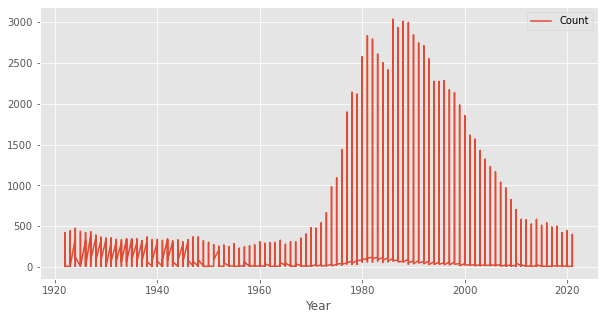

In [25]:
# Create your line plot here.
female_sarahs.plot(kind = "line", x = "Year", y = "Count")

Around what year was the peak in popularity for the name Sarah for female babies? Choose the closest answer from the options below and set `female_sarah_peak` to 1, 2, 3, or 4 corresponding to your answer choice.
1. 1960
1. 1980
1. 2000
1. 2010

In [26]:
female_sarah_peak = 2

In [27]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** In the `baby` DataFrame, how many babies of each gender were born in each state? Create a DataFrame named `num_babies` with one row for each gender in each state and columns `'State'`, `'Gender'`, and `'Count'`, which contains the total number of babies of each gender in each state with an "S" name. The first few rows of `num_babies` are shown below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>State</th>
      <th>Gender</th>
      <th>Count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>AK</td>
      <td>F</td>
      <td>18578</td>
    </tr>
    <tr>
      <th>1</th>
      <td>AK</td>
      <td>M</td>
      <td>12977</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AL</td>
      <td>F</td>
      <td>210111</td>
    </tr>
    <tr>
      <th>3</th>
      <td>AL</td>
      <td>M</td>
      <td>99395</td>
    </tr>
  </tbody>
</table>

*Hints*: 
- You can do this in one line of code.
- Don't forget to use `.reset_index()`.


In [114]:
num_babies = baby.groupby(['State', 'Gender']).sum().drop(columns=['Year']).reset_index()
num_babies

,State,Gender,Count,Total_Age
0,AK,F,18578,744867
1,AK,M,12977,506700
2,AL,F,210111,11469799
3,AL,M,99395,5007488
4,AR,F,120379,6382167
...,...,...,...,...
97,WI,M,143628,6981296
98,WV,F,111620,6534823
99,WV,M,52622,2836262
100,WY,F,17651,931968


In [115]:
grader.check("q1_2")

q1_2 results:
    q1_2 - 1 result:
        Trying:
            isinstance(num_babies,bpd.DataFrame) and num_babies.shape == (102, 3) and baby.shape == (377074, 5) # Don't change the original baby DataFrame.
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_2 0
        Failed example:
            isinstance(num_babies,bpd.DataFrame) and num_babies.shape == (102, 3) and baby.shape == (377074, 5) # Don't change the original baby DataFrame.
        Expected:
            True
        Got:
            False

A gendered name is a combination of a name and a gender, such as male Sarahs. Let's explore the average age of people with each gendered name. For example, let's calculate the average age of all male Sarahs.

In [30]:
male_sarahs

,State,Gender,Year,Name,Count
4233,SC,M,1924,Sarah,6
7760,GA,M,1927,Sarah,5
8999,AL,M,1928,Sarah,5
10132,PA,M,1928,Sarah,5
12992,SC,M,1930,Sarah,5
...,...,...,...,...,...
242552,CA,M,1996,Sarah,5
263180,FL,M,2000,Sarah,5
265445,NY,M,2000,Sarah,5
281587,PA,M,2003,Sarah,6


We'll define the age of a person as 2023 (the current year) minus the year in which the person was born. This doesn't take into account people's birthdays, because we don't have that information. For example, if a male Sarah was born in 1983, they will be counted as 2023 - 1983 = 40 years old. Therefore the **total age** of all the male Sarahs is given below.

In [31]:
total_age = ((2023 - male_sarahs.get('Year')) * male_sarahs.get('Count')).sum()
total_age

37010

To find the average age, we need to know how many male Sarahs there are. The **total count** of male Sarahs is given below.

In [32]:
total_count = male_sarahs.get('Count').sum()
total_count

884

Therefore the **average age** of male Sarahs is given below.

In [33]:
average_age = total_age / total_count
average_age

41.866515837104075

Notice that we _cannot_ calculate the average age of male Sarahs as follows.

In [34]:
age = 2023 - male_sarahs.get('Year')
age.mean()

45.24545454545454

This is incorrect because it does not take into account the fact that there were more male Sarahs born some years than others.

**Question 1.3.** Create a DataFrame named `avg_age` that has one row for each gendered name and columns `'Gender'`, `'Name'`, and `'Average_Age'`, which contains the average age of all people with each gendered name. The first few rows of `avg_age` are shown below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Gender</th>
      <th>Name</th>
      <th>Average_Age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>M</td>
      <td>Saabir</td>
      <td>3.500000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>F</td>
      <td>Saachi</td>
      <td>12.309859</td>
    </tr>
    <tr>
      <th>2</th>
      <td>M</td>
      <td>Saad</td>
      <td>17.347826</td>
    </tr>
    <tr>
      <th>3</th>
      <td>F</td>
      <td>Saadia</td>
      <td>47.454545</td>
    </tr>
  </tbody>
</table>

*Hints*: 
- Before attempting this question, make sure you understand the strategy shown above for finding the average age of male Sarahs. You will need to generalize this approach.
- This is a multi-step problem. Add cells and display your intermediate results so you can see your progress as you go.
- You should check that the average age for male Sarahs in your DataFrame `avg_age` is the same as we found above.


In [35]:
baby = baby.assign(Total_Age=(2023 - baby.get('Year')) * baby.get('Count'))

# Step 2: Group by 'Name' and 'Gender'
grouped_baby = baby.groupby(['Name', 'Gender'])

# Step 3: Calculate the sum of 'Count' and 'Total_Age' for each group
sum_count = grouped_baby['Count'].sum()
sum_total_age = grouped_baby['Total_Age'].sum()

# Step 4: Combine the sum of 'Count' and 'Total_Age' into a new DataFrame
grouped_baby_sums = bpd.DataFrame().assign(Name=sum_count.index.get_level_values('Name'), Gender=sum_count.index.get_level_values('Gender'), Total_Age=sum_total_age, Count=sum_count).reset_index(drop=True)

# Step 5: Create a new column 'Average_Age'
grouped_baby_sums = grouped_baby_sums.assign(Average_Age=grouped_baby_sums.get('Total_Age') / grouped_baby_sums.get('Count'))

# Step 6: Select the columns 'Gender', 'Name', and 'Average_Age'
avg_age = grouped_baby_sums.get(['Gender', 'Name', 'Average_Age'])

avg_age


TypeError: 'DataFrameGroupBy' object is not subscriptable

In [36]:
grader.check("q1_3")

q1_3 results:
    q1_3 - 1 result:
        Trying:
            isinstance(avg_age,bpd.DataFrame) and avg_age.shape == (2739, 3) and 'Average_Age' in avg_age.columns and baby.shape == (377074, 5) # Don't change the original baby DataFrame.
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_3 0
        Failed example:
            isinstance(avg_age,bpd.DataFrame) and avg_age.shape == (2739, 3) and 'Average_Age' in avg_age.columns and baby.shape == (377074, 5) # Don't change the original baby DataFrame.
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_3 0[0]>", line 1, in <module>
                isinstance(avg_age,bpd.DataFrame) and avg_age.shape == (2739, 3) and 'Average_Age' in avg_age.columns and baby.shape == (377074, 5) # Don't change the original baby DataFrame.
            NameError: name 'avg_age' is not defined

## 2. Death and Taxes 💰💸

The United States, like many countries, uses a progressive tax bracket system. This means that as your earnings increase, the percentage of your earnings you owe in tax also increases. In addition, the US tax system uses marginal tax brackets – what this means is that US taxpayers pay different tax percentages on different "chunks" of their earnings.

This year, taxes were due on April 18th, however, most California counties (including San Diego) received a blanket 6 month "disaster" extension, making the new deadline October 16th. If you want to read more about this extension, here's a link to a [news article](https://www.cbs8.com/article/news/local/working-for-you/tax-deadline-for-all-san-diegans-october-16th/509-cbefb862-efc9-4cee-aa56-6951d1996992) about it. Let's suppose the tax brackets for the 2023 tax year for single filers are defined by the table below. These are pretty close to the actual brackets, but for simplicity's sake we'll use 5 brackets instead of 7. 

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

**You will need to use these numbers throughout this question.**

A few notes:
- The notation $(a, b]$ means "greater than $a$ and less than or equal to $b$". For example, someone with a taxable income of \\$44,725 is in the 12% bracket, but someone with a taxable income of \\$44,725.01 is in the 22% bracket.
- "Taxable income" refers to the part of one's income that is taxable; in the US there is what's known as a "standard deduction" which can be thought of as a discount on your taxes. In this question, we won't worry about deductions.

If someone has a taxable income of \\$75,000, we say they are in the 22% tax bracket. However, such an individual doesn't owe 22% of \\$75,000 in taxes. Instead, they owe:
- 10% of \\$11,000, **plus**
- 12% of \\$33,725 (which is \\$44,725 - \\$11,000), **plus**
- 22% of \\$30,275 (which is \\$75,000 - \\$44,725).

More concretely, their tax owed is
$$0.1 \cdot \$11{,}000 + 0.12 \cdot \$33{,}725 + 0.22 \cdot \$30{,}275 = \$11{,}807.50.$$ 

This makes their **effective tax rate** 
$$\frac{\$11{,}807.50}{\$75{,}000} = 0.15743,$$
or 15.743\%, because they wound up having to pay 15.743\% of their taxable income in taxes. We will give effective tax rates as percentages, rounded to three decimal places.

If you want to read more about the US federal income tax system, click [here](https://www.taxpolicycenter.org/briefing-book/how-do-federal-income-tax-rates-work).

**Question 2.1.** Complete the implementation of the function `tax_bracket`, which takes in a taxable income (`income`) and returns the tax bracket it is in, as a **proportion**. For instance, `tax_bracket(75000)` should evaluate to `0.22` and `tax_bracket(402150)` should evaluate to `0.32`.

For your convenience, the tax bracket table is shown again below.

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

*Hint*: Use `elif`.

In [37]:
def tax_bracket(income):
    if income <= 11000:
        return 0.10
    if income <= 44725:
        return 0.12
    if income <= 95375:
        return 0.22
    if income <= 182100:
        return 0.24
    else:
        return 0.32

In [38]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Complete the implementation of the function `tax_owed`, which takes in a taxable income (`income`) and returns the amount of tax owed by an individual with that taxable income. For instance, `tax_owed(75000)` should evaluate to `11807.5` as in the example at the start of Question 2.

For your convenience, the tax bracket table is shown again below.

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

*Hint*: Below are some suggested steps to break down this problem into manageable chunks.
1. Make sure you understand the example calculating the tax owed on \\$75,000 of taxable income. 
2. Once you're sure you understand the given example calculation, then calculate the tax owed for a different taxable income, say \\$152,000, by hand. 
3. In a blank cell in your notebook, write Python code to compute the tax owed for \\$152,000 in taxable income and verify you get the same answer as when you did it by hand. 
4. Once you have that working, write the more general function and test it on a variety of inputs.

In [39]:
def tax_owed(income):
    owed = 0
    if income > 11000:
        owed += 0.1 * 11000
        income -= 11000
    else:
        owed += 0.1 * income
        income = 0
    if income > 0:
        owed += 0.12 * min(income, 44725 - 11000)
        income -= (44725 - 11000)
    if income > 0:
        owed += 0.22 * min(income, 95375 - 44725)
        income -= (95375 - 44725)
    if income > 0:
        owed += 0.24 * min(income, 182100 - 95375)
        income -= (182100 - 95375)
    if income > 0:
        owed += 0.32 * income
    return owed

In [40]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Finally, complete the implementation of `effective_tax_rate`, which takes in a taxable income (`income`) and returns the effective tax rate for an individual with that taxable income, as a **percentage** rounded to three decimal places. For instance, `effective_tax_rate(75000)` should evaluate to `15.743` because someone who earns \\$75,000 of taxable income winds up having to pay 15.743\% of that amount in taxes. 

If `income` is less than or equal to 0, `effective_tax_rate` should evaluate to `0`.

*Hint*: You should use your `tax_owed` function. Our entire solution is only four lines, and two of them are for handling the case when `income <= 0`.

In [41]:
def effective_tax_rate(income):
    if income <= 0:
        return 0
    owe = tax_owed(income)
    rate = owe / income
    return round(rate, 3)

In [42]:
grader.check("q2_3")

q2_3 results:
    q2_3 - 1 result:
        Trying:
            callable(effective_tax_rate) and np.isclose(effective_tax_rate(75000), 15.743)
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_3 0
        Failed example:
            callable(effective_tax_rate) and np.isclose(effective_tax_rate(75000), 15.743)
        Expected:
            True
        Got:
            False

    q2_3 - 2 result:
        Test case passed!

### Fun Demo

You just did all of the math necessary to build an income tax calculator, like the ones you see on many financial websites. Run the following cell once you've completed the rest of this question!

In [43]:
# Don't worry about the code, just play with the slider that appears after running.
def plot_income_calculator(income):
    s = f'''
    <h1>DSC 10 Tax Calculator 💰💸</h1>
    <h3>{'${:,.2f}'.format(income)}</h3>
    Taxable Income
    
    <h2>{'${:,.2f}'.format(tax_owed(income))}</h2>
    Tax Owed
    
    <h3>{'{:,.1f}'.format((effective_tax_rate(income))) + '%'}</h3>
    Effective Tax Rate
    
    '''
    display(HTML(s))
    
interact(plot_income_calculator, income=(0, 200000, 1000));

interactive(children=(IntSlider(value=100000, description='income', max=200000, step=1000), Output()), _dom_cl…

## 3. Trick or Treat 🍭🎃

Halloween is almost exactly 6 months away, and companies are getting ready for the 2023 Halloween season. They are asking you to analyze data about the most popular Halloween candies in each state. 

In this question, our data comes from [this article](https://www.candystore.com/blogs/facts-trivia/halloween-candy-map-popular?y=2022). Run the cell below to see a fun interactive data visualization from the same article.

In [53]:
candy_map()

In [54]:
states = bpd.read_csv('data/popular_candy_by_state.csv')
states

,State,Most_Popular_Candy,Pounds_Of_Candy
0,AL,Skittles,105263
1,AK,Sour Patch Kids,4873
2,AZ,Hersheys Kisses,779828
3,AR,Butterfinger,201837
4,CA,Reeses Peanut Butter Cups,1231675
...,...,...,...
46,DC,M&Ms,24770
47,WA,Tootsie Pops,167289
48,WV,Hersheys Mini Bars,36279
49,WI,Butterfinger,104829


In the `states` DataFrame above, each state's `'Most_Popular_Candy'` is recorded, based on candy sales in that state. `'Pounds_Of_Candy'` refers to the total pounds of that specific candy sold in that state. For instance, the first row is telling us that 105,263 pounds of Skittles were sold in Alabama.<br>

The `states` DataFrame does not contain any information about the candies themselves, e.g. which candies are chocolate and which candies are fruity. For this information, we can refer to a dataset curated by FiveThirtyEight for their article [The Ultimate Halloween Candy Power Ranking](https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/). Run the cell below to load in a dataset containing information about many varieties of candy and save it as a DataFrame named `varieties`.

_Note_: The column in `varieties` that contains the names of the candies is `'competitorname'`, because these candies were all competing against each other in FiveThirtyEight's Halloween Candy Power Ranking.

In [55]:
varieties = bpd.read_csv('data/halloween_candy.csv')
varieties

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One Dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One Quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welchs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werthers Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


**Question 3.1.** Using the `merge` method, combine the `states` and `varieties` DataFrames, and assign the resulting DataFrame to the variable `states_and_varieties`. 
- `states_and_varieties` should contain all of the columns in both `states` and `varieties`, minus the `'competitorname'` column from `varieties`, which is redundant with the `'Most_Popular_Candy'` column from `states`.
- Sort `states_and_varieties` by `'State'` in ascending order.
- Reset the index of `states_and_varieties` so that it is `0`, `1`, `2`, and so on. Make sure the old index isn't also included as a column.

*Hint*: Notice how `'Most_Popular_Candy'` from `states` and `'competitorname'` from `varieties` contain names of candy. How can you use this in your `merge`?

In [58]:
states_and_varieties = varieties.merge(states, left_on='competitorname', right_on='Most_Popular_Candy')

states_and_varieties = states_and_varieties.drop(columns=['competitorname'])

states_and_varieties = states_and_varieties.sort_values(by='State')

states_and_varieties = states_and_varieties.reset_index(drop=True)

states_and_varieties

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,State,Most_Popular_Candy,Pounds_Of_Candy
0,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,AK,Sour Patch Kids,4873
1,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,AL,Skittles,105263
2,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,AZ,Hersheys Kisses,779828
3,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,CA,Reeses Peanut Butter Cups,1231675
4,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,CO,Hersheys Kisses,120982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,UT,Tootsie Pops,403727
40,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,VA,Snickers,151728
41,1,0,0,0,0,0,0,0,1,0.825,0.651,66.574585,VT,M&Ms,36543
42,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,WA,Tootsie Pops,167289


In [59]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** If you completed Question 3.1 correctly, you'll notice that `states_and_varieties` has fewer rows than both `states` and `varieties`. This is because there are some candies that are in `states` and not in `varieties`, and other candies that are in `varieties` and not in `states`. 

Below, assign `states_not_varieties` to the number of different candies that are in `states` and not in `varieties`. Similarly, assign `varieties_not_states` to the number of different candies that are in `varieties` and not in `states`.

_Hint_: There are two ways to find the number of unique values in a column.

1. Group by that column. On the resulting DataFrame, use `.shape[0]`.

2. Use the `.unique()` method on the Series corresponding to that column. Use `len` on the resulting array.

You'll need to do this three times – once each for the columns that contain candy names in `states`, `varieties`, and `states_and_varieties`.


<!--
BEGIN QUESTION
name: q3_2
-->

In [60]:
st = states.groupby("Most_Popular_Candy").shape[0]
print(st)

AttributeError: 'DataFrameGroupBy' object has no attribute 'shape'

In [98]:
unique_states = len(states.get("Most_Popular_Candy").unique())
unique_varieties = len(varieties.get("competitorname").unique())
unique_states_and_varieties = len(states_and_varieties.get("Most_Popular_Candy").unique())

states_not_varieties = unique_states - unique_states_and_varieties
varieties_not_states = unique_varieties - unique_states_and_varieties

print('There are', states_not_varieties, 'candies in `states` that are not in `varieties`.')
print('There are', varieties_not_states, 'candies in `varieties` that are not in `states`.')

There are 2 candies in `states` that are not in `varieties`.
There are 70 candies in `varieties` that are not in `states`.


In [99]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Now that we better understand how `states_and_varieties` came to be, let's use it to learn more about states' candy preferences.

In [100]:
states_and_varieties

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,State,Most_Popular_Candy,Pounds_Of_Candy
0,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,AK,Sour Patch Kids,4873
1,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,AL,Skittles,105263
2,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,AZ,Hersheys Kisses,779828
3,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,CA,Reeses Peanut Butter Cups,1231675
4,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454,CO,Hersheys Kisses,120982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,UT,Tootsie Pops,403727
40,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,VA,Snickers,151728
41,1,0,0,0,0,0,0,0,1,0.825,0.651,66.574585,VT,M&Ms,36543
42,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,WA,Tootsie Pops,167289


The 0s and 1s in the columns `'chocolate'`, `'fruity'`, `'caramel'`, etc. can be interpreted as Boolean values. For instance, since the state `'CA'` has a 1 in its `'chocolate'` column, it means that California's most popular candy includes chocolate.

**Question 3.3.** Among just the states in `states_and_varieties` where the most popular candy includes chocolate, what proportion of these states have a most popular candy that also includes caramel? Assign your answer to `p_caramel_given_chocolate`. It should be a decimal between 0 and 1.

<!--
BEGIN QUESTION
name: q3_3
-->

In [102]:
chocolate_states = states_and_varieties[states_and_varieties.get("chocolate") == 1]
caramel_chocolate_states = chocolate_states[chocolate_states.get("caramel") == 1]

p_caramel_given_chocolate = caramel_chocolate_states.shape[0] / chocolate_states.shape[0]
p_caramel_given_chocolate


0.17857142857142858

In [103]:
grader.check("q3_3")

q3_3 results: All test cases passed!

## 4. Triton Tweets 🧜‍♂️💬


<img src = "data/triton_logo.jpg" width=200>

UCSD is starting it's own messaging app called Triton Tweets exclusive to staff and students! One of the key features of Triton Tweets is that when students send out messages, an emoji representing their college is automatically added to the end of their message. Your job in this question is to decide what emoji represents each college (not including the brand-new Eigth College) and to add these emojis to their tweets, using Python dictionaries and `for`-loops.

 We'll start by reminding you about Python dictionaries, which we also looked at briefly in Homework 2 (in the question about diamonds 💎). Dictionaries provide a convenient way to store data in `key: value` pairs. Here's an example dictionary you also saw in Homework 2.

In [67]:
dsc_courses = {
    # key: value
    'DSC 10': 'Principles of Data Science',
    'DSC 20': 'Programming and Basic Data Structures for Data Science',
    'DSC 30': 'Data Structures and Algorithms for Data Science',
    'DSC 40A': 'Theoretical Foundations of Data Science I',
    'DSC 40B': 'Theoretical Foundations of Data Science II',
    'DSC 80': 'The Practice and Application of Data Science'
}

We can access the value corresponding to each key using bracket notation.

In [68]:
dsc30_name = dsc_courses['DSC 30']
dsc30_name

'Data Structures and Algorithms for Data Science'

Here, `'DSC 30'` is the key and `'Data Structures and Algorithms for Data Science'` is the value.

We can extract all keys from a dictionary using the .keys() method:

In [69]:
dsc_courses.keys()

dict_keys(['DSC 10', 'DSC 20', 'DSC 30', 'DSC 40A', 'DSC 40B', 'DSC 80'])

We can iterate through all of the keys (or values) of a dictionary if needed. For example:

In [70]:
for course in dsc_courses.keys():
    print('I am taking', course)

I am taking DSC 10
I am taking DSC 20
I am taking DSC 30
I am taking DSC 40A
I am taking DSC 40B
I am taking DSC 80


In Python, emojis can be included as part of a string. For example:

In [71]:
'🤣'

'🤣'

If you remove the quotes from the emoji above, you will see `SyntaxError: invalid character` in identifier. Make sure that throughout this question, your emojis are contained within strings! (Fun fact, they cannot currently be used as variable names. Try it and see what error you get!)

The website [getemoji.com](https://getemoji.com/) allows you to copy and paste emojis. To select an emoji, double click it to highlight it. Try copying and pasting an emoji of your choice from that site into the code cell below. Don't forget to enclose it in quotes!

In [72]:
# Copy and paste any emoji into this code cell.
'🤣'

'🤣'

**Question 4.1** In the cell below, create a dictionary called `colleges` that has the following seven keys:
- `'<Revelle>'` 
- `'<Muir>'`
- `'<Marshall>'`
- `'<Warren>'`
- `'<ERC>'`
- `'<Sixth>'`
- `'<Seventh>'`

The reason why we are writing the college is <> brackets is because the username format for Triton Tweets is "@name\<college\>." Every username is made up of an @ symbol, the student's name, and their college in <> brackets. You can assume that <> characters will never exist within the name portion of the username. By the end of this question, \<college\> will be changed into an emoji.

The values corresponding to each of these seven keys must be emojis, but they can be any emoji you want, as long as:

- they are copied from the site [getemoji.com](https://getemoji.com/)
- they are not in the "New Emojis" category at the bottom 

Have fun with it! We've chosen an emoji for `'<Revelle>'` as an example for you, but feel free to change it.

Some troubleshooting tips:

After defining your dictionary, you may see some emoijs displayed with `'\U001...'` instead of their actual graphic. **If this happens, pick different emojis.**
If you fail the test case that says your emojis are invalid, and you're certain you correctly defined your dictionary, you may consider choosing other emojis that are more generic that are more likely to be recognized by our autograder. This most likely won't be a problem.

In [73]:
colleges = {
    '<Revelle>': '🩺',
    '<Muir>': '😅',
    '<Marshall>': '😨',
    '<Warren>': '😲',
    '<ERC>': '👹',
    '<Sixth>': '💩',
    '<Seventh>': '👻'
}
type(colleges)

dict

In [74]:
grader.check("q4_1")

q4_1 results: All test cases passed!

Great! Now, if we want to create strings that use the college emojis, we don't need to copy-paste the emojis themselves – we can just access them from the `colleges` dictionary.

In [75]:
colleges['<Sixth>']

'💩'

In [76]:
# Remember, the + symbol concatenates strings!
'@Sarah' + colleges['<ERC>']

'@Sarah👹'

Recall, in [Lecture 10](https://dsc10.com/resources/lectures/lec10/lec10.html), we introduced the accumulator pattern. In the coin-flipping example, we started with an empty array, and added to it in each iteration of our `for`-loop.

We can also use the accumulator pattern for strings, by starting with an empty string, and repeatedly adding onto it via concatenation. Here's an example that loops through the letters in a word and replaces certain letters with emojis.

In [77]:
output = ''
for ch in 'goodbye':
    if ch != 'o':
        output = output + ch
    else:
        output = output + colleges["<ERC>"]
output

'g👹👹dbye'

In the above example, we started with an empty string, `'output'`. For each character of the string `'goodbye'`, we added a single new character to `'output'`. If the character happened to be an 'o', it was replaced by the `'<ERC>'` emoji inside the `'colleges'` dictionary. 

**Question 4.2.** Now, complete the implementation of the function `emojify`, which take as input a string that represents the students' username. The username has the format "@name\<college\>." Every username will be made up of an @ symbol, the student's name, and their college in <> brackets. You can assume that <> characters will never exist within the name portion of the username. The function should return a new string with the \<college\> replaced by the corresponding emoji from the `colleges` dictionary. You can also include a message that goes after the username. Here is how the function would work on various example usernames and tweets. Your emojis may look different depending on what emojis you used in the `colleges` dictionary.

```py
>>> emojify('@Sophia<ERC>: I love DSC10!')
'@Sophia🌎: I love DSC10!'

>>> emojify('@Billy<Sixth>: Makai is the best dining hall!')
'@Billy🐈: Makai is the best dining hall!'

>>> emojify('@Raine<Warren>: I have not slept in days')
'@Raine🧸: I have not slept in days'
```

_Note_: As we did in the preceding example, use the dictionary `colleges` to access the emojis – don't actually write any emojis within your function.

_Hints_: 
- You will need to use a `for`-loops for this question. Refer to the example dictionary from the start of the problem (where we printed 'I am taking DSC 10') for some clues on how to start.
- Look into the [.replace](https://www.w3schools.com/python/ref_string_replace.asp) method for strings.
- Remember to write a general function that works for any answer word, not just `'@Sarah<ERC>'`.

In [78]:
def emojify(tweet):
    for college in colleges:
        if college in tweet:
            tweet = tweet.replace(college, colleges[college])
        
    # Don't change this.
    return tweet

# An example call to emojify. Try out some other usernames too.
emojify('@Sarah<ERC>: Make sure to come to the club social tonight!')

'@Sarah👹: Make sure to come to the club social tonight!'

In [79]:
grader.check("q4_2")

q4_2 results: All test cases passed!

### Fun Demo

Run the cell below to produce a text box (don't worry about the code itself). Type a username (@name\<college\>) in the text box and watch it get categorized live! 

In [80]:
def emojify_live(type_here):
    display(HTML('<h2>' + emojify(type_here) + '</h2>'))
interact(emojify_live, type_here="");

interactive(children=(Text(value='', description='type_here'), Output()), _dom_classes=('widget-interact',))

## 5. Alternating Means 🔁

In this problem, we'll define two functions that compute some sort of "alternating mean" of a sequence of values.

**Question 5.1.** Complete the implementation of the function `alternating_mean`, which takes in an array of numbers, `values`, and computes the mean of **every other element** in the original array starting with the element at position 0.

```py
>>> alternating_mean(np.array([3, 1.5, 4, 3.5]))
3.5 # Comes from (3 + 4) / 2.

>>> alternating_mean(np.array([3, 1.5, 4, 3.5, 5.9]))
4.3 # Comes from (3 + 4 + 5.9) / 3.

```

Once you've written your function, you should test it out on several arrays yourself to make sure it works as intended.

_Hint_: Compute the mean by finding the sum of every other element in the array and dividing it by the number of elements that were summed.

<!--
BEGIN QUESTION
name: q5_1
-->

In [81]:
def alternating_mean(values):
    even_ind = np.arange(0, len(values), 2)
    even_vals = values[even_ind]
    return even_vals.mean()
        
    
# Feel free to change this input to make sure your function works correctly.
alternating_mean(np.array([3, 1.5, 4, 3.5]))

3.5

In [82]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** In math, the word "alternating" is sometimes used to indicate that the signs of the elements of a sequence oscillate, or "bounce", back and forth between positive and negative. Complete the implementation of the function `alternating_sign_mean`, which takes in an array of positive numbers, `values`, and computes the mean of **_every_ element** in the original array with **alternating signs**, starting with a positive sign for the element at position 0, a negative sign for the element at position 1, and so on. Example behavior is shown below.

```py
>>> alternating_sign_mean(np.array([3, 2, 9.5]))
3.5 # Comes from (3 + (-2) + 9.5) / 3.

>>> alternating_sign_mean(np.array([3, 2.5, 7, 6.5]))
0.25 # Comes from (3 + (-2.5) + 7 + (-6.5)) / 4.
```

*Hint*: If `x` is an integer, `x % 2` evaluates to 0 when `x` is even and to 1 when `x` is odd. If `x` represents the position of an element in the array, you can use this to help you figure out whether the sign should be positive or negative.

<!--
BEGIN QUESTION
name: q5_2
-->

In [83]:
def alternating_sign_mean(values):
    even_index = np.arange(0, len(values), 2)
    odd_index = np.arange(1, len(values), 2)
    even_values = values[even_index]
    odd_values = (values[odd_index]) * -1
    summ = np.concatenate((even_values, odd_values))
    return summ.mean()
    
    
    
# Feel free to change this input to make sure your function works correctly.
alternating_sign_mean(np.array([3, 2, 9.5]))

3.5

In [84]:
grader.check("q5_2")

q5_2 results: All test cases passed!

## 6. Lucky Triton Lotto 🔱 🎱 

Suppose UCSD holds an annual lottery called the Lucky Triton Lotto, where students can enter to win Triton Cash, or even free housing! Here's how the Lucky Triton Lotto works:

- First, you pick five **different** numbers, one at a time, from 1 to 34, representing that according to [USNews](https://www.usnews.com/best-colleges/university-of-california-san-diego-1317#:~:text=based%20academic%20calendar.-,University%20of%20California%2C%20San%20Diego's%20ranking%20in%20the%202022%2D2023,Jolla%20community%20of%20San%20Diego.), UCSD is ranked 34 in the nation for best universities to attend for 2022-2023.
- Then, you separately pick a number from 1 to 10. This is because UCSD's Data Science program is rank 10th in [USNews's](https://ucsdtritons.com/news/2020/9/8/general-triton-tuesday-uc-san-diego-home-to-award-winning-faculty.aspx) Best Undergraduate Data Science Programs list. Let's say you select 3.
- The six numbers you have selected, or  **your numbers**, can be represented all together as (7, 12, 24, 15, 13, 3). This is a _sequence_ of six numbers – **order matters**!

The **winning numbers** are chosen by King Triton drawing five balls, one at a time, **without replacement**, from a pot of white balls numbered 1 to 34. Then, he draws a gold ball, the Tritonball, from a pot of gold balls numbered 1 to 10. Both pots are completely separate, hence the different ball colors. For example, maybe the winning numbers are (15, 9, 24, 23, 1, 3).

We’ll assume for this problem that in order to win the grand prize (free housing), all six of your numbers need to match the winning numbers and be in the **exact same positions**. In other words, your entire sequence of numbers must be exactly the same as the sequence of winning numbers. However, if some numbers in your sequence match up with the corresponding number in the winning sequence, you will still win some Triton Cash. 

Suppose again that you select (7, 12, 24, 15, 13, 3) and the winning numbers are (15, 9, 24, 23, 1, 3). In this case, two of your numbers are considered to match two of the winning numbers. 
- Your numbers: (7, 12, **24**, 15, 13, **3**)
- Winning numbers: (15, 9, **24**, 23, 1, **3**)

You won't win free housing, but you will win some Triton Cash. Note that although both sequences include the number 15 within the first five numbers (representing a white ball), since they are in different positions, that's not considered a match.


**Question 6.1.** What is the probability that your Tritonball number (the last number in your sequence) matches the winning Tritonball number? Calculate your answer and assign it to `tritonball_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

In [85]:
tritonball_chance = 1/10
tritonball_chance

0.1

In [86]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Question 6.2.** What is the probability that your first three numbers match the first three winning numbers? Calculate your answer and assign it to `first_three_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

_Hint_: You need **all three** of the first three numbers to match. What probability rule should you use?

In [87]:
first_three_chance = (1/34)*(1/33)*(1/32)
first_three_chance

2.7852049910873442e-05

In [88]:
grader.check("q6_2")

q6_2 results: All test cases passed!

**Question 6.3.** What is the probability that you win the grand prize, free housing? Calculate your answer and assign it to `free_housing_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

_Hint_: When you select a ball without replacement, what happens to the total number of balls you can select next time?

In [89]:
free_housing_chance = (1/34)*(1/33)*(1/32)*(1/31)*(1/30)*(1/10)
free_housing_chance

2.9948440764380047e-09

In [90]:
grader.check("q6_3")

q6_3 results: All test cases passed!

**Question 6.4.** What is the probability that you do **not** win free housing? Calculate your answer and assign it to `no_free_housing_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

In [91]:
no_free_housing_chance = 1 - free_housing_chance
no_free_housing_chance

0.999999997005156

In [92]:
grader.check("q6_4")

q6_4 results: All test cases passed!

## Finish Line 🏁

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [116]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results:
    q1_2 - 1 result:
        Trying:
            isinstance(num_babies,bpd.DataFrame) and num_babies.shape == (102, 3) and baby.shape == (377074, 5) # Don't change the original baby DataFrame.
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_2 0
        Failed example:
            isinstance(num_babies,bpd.DataFrame) and num_babies.shape == (102, 3) and baby.shape == (377074, 5) # Don't change the original baby DataFrame.
        Expected:
            True
        Got:
            False

q1_3 results:
    q1_3 - 1 result:
        Trying:
            isinstance(avg_age,bpd.DataFrame) and avg_age.shape == (2739, 3) and 'Average_Age' in avg_age.columns and baby.shape == (377074, 5) # Don't change the original baby DataFrame.
        Expecting:
            True
        **********************************************************************
        Line 